<a href="https://colab.research.google.com/github/Cesarloz/C-lculo-Diferencial/blob/master/Complejos_en_python_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python puede hacer operaciones basicas con complejos**
pero recuerda que para el lenguaje i=J

In [29]:
#Los complejos estan incorporados en python
2+3J-(3+2J)


(-1+1j)

## Puedes usar las formulas de operaciones de complejos para crear una rutina  

ejemplo el modulo es: 

$\left | z \right |=\sqrt{a^{2}+b^{2}}$

esto se escribiria sqrt(a * * 2+b * * 2)

In [29]:
# Se puede construir desde cero las operaciones

from math import sqrt

def complex(a,b): # esto define una funcion 

  m=sqrt(a**2+b**2) # el modulo puedes guardarlo en la variable m
  arg=math.atan2(b,a) #el argumento
 
  print("modulo",sqrt(a**2+b**2))# puedes imprimirlo sin guardar en la variable es decir hace la operacion directa
  print("argumento en rad:",math.atan2(b,a))
  print("polar:",m,"CiS",argr)# puedes llamar a la variable que le asignaste el valor

complex(2,3) # asi llamas a la funcion que creas el usiario envia complex(2,3) es decir 2+3i



modulo 3.605551275463989
argumento en rad: 0.982793723247329
argumento: en grad 56.309932474020215
polar: 3.605551275463989 CiS 56.309932474020215


## La libreria de complejos es **sympy** 
(esto es lo que hicimos en clase de hoy)

In [19]:
# Si no quieres implementar desde cero, puedes usar la libreria para complejos
from sympy import I, simplify, conjugate, arg
from sympy import Symbol,E


def complex2(a,b):
  z=a+b*I
  print("conjugado",conjugate(z))
  print(abs(z))
  print(abs(z).evalf())
  print(arg(z).evalf())
  print(abs(z).evalf(),"CiS",arg(z).evalf())

complex2(2,3) # este es el complejo 2+3i




conjugado 2 - 3*I
sqrt(13)
3.60555127546399
0.982793723247329
3.60555127546399 CiS 0.982793723247329


input para que el usuario introduzca el complejo 

In [28]:
# si queremos que el usuario introdusca el complejo debemos separa la parte real e imaginaria debida a que a es una cadena a[0]=parte real a[2]=imaginaria
from sympy import I, simplify
numero=input("cual")
a,b=numero.split("+")#debes separa el complejo debido a que es una cadena 
b,i=b.split("i")# debes quitarle la i para para quedarte solo con el numero
b=float(b)# esto convierte a a punto flotante la cadena 
a=float(a)
z=a+b*I # vuelves a crear el complejo pero ya no es una cadena
print(z)
print(z*z)

cual3.5+7.7i


3.5 + 7.7*I

# De forma porlar a forma binomica debes hacer 
import Symbol,E

para escribir el complejo en su forma exponencial 
$z=\left | z \right |e^{\theta i}$

In [14]:
#en su forma polar pero debes usar radianes no tiene problemas con el cuadrante
from sympy import I, simplify, conjugate, arg
from sympy import Symbol,E
import math 

def complexp(ar,an):
  
  z=ar*E**(an*I)# asi se escribe en su polar exponencial
  print(z.expand(complex=True))
  print(z.expand(complex=True).evalf())
complexp(3,-2)

3*cos(2) - 3*I*sin(2)
-1.24844050964143 - 2.72789228047704*I


Esta es una aplicacion de los complejos, los fractales, los cuales es una iteracion de operaciones entre un mismo complejo. 

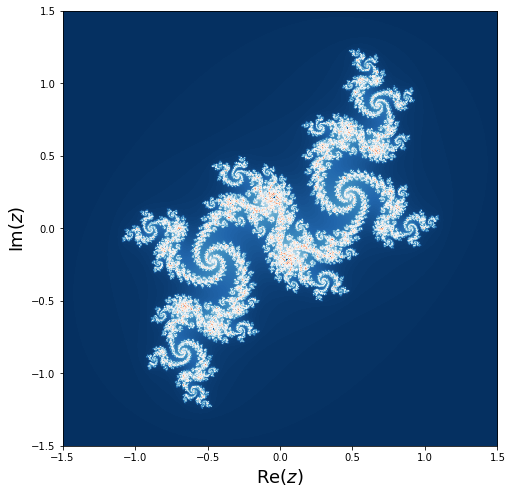

In [57]:
#Los fractales 
# importando librerías necesarias
import numpy as np
import numba
import matplotlib.pyplot as plt

def py_julia_fractal(z_re, z_im, j):
    '''Crea el grafico del fractal de Julia.'''
    for m in range(len(z_re)):
        for n in range(len(z_im)):
            z = z_re[m] + 1j * z_im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break
                    
jit_julia_fractal = numba.jit(nopython=True)(py_julia_fractal)

N = 1024
j = np.zeros((N, N), np.int64)
z_real = np.linspace(-1.5, 1.5, N)
z_imag = np.linspace(-1.5, 1.5, N)
jit_julia_fractal(z_real, z_imag, j)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(j, cmap=plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)
plt.show()

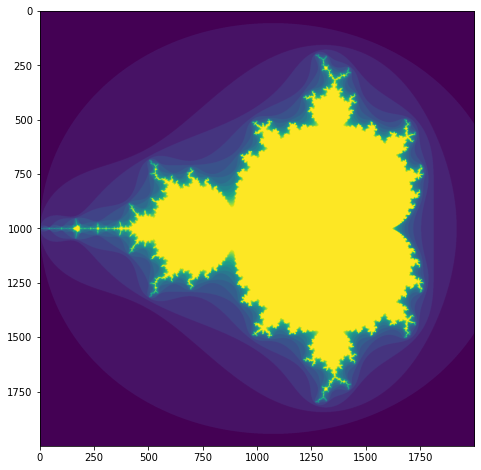

In [58]:
def mandelbrot( h,w, maxit=20 ):
    '''Crea el grafico del fractal de Mandelbrot del tamaño (h,w).'''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2         
        div_now = diverge & (divtime==maxit)  
        divtime[div_now] = i                  
        z[diverge] = 2                        
        
    return divtime

plt.figure(figsize=(8,8))
plt.imshow(mandelbrot(2000,2000))
plt.show()